# 2 - COMPUTER VISION - Hough Transform
    The aim of this program is to implement a basic Hough Transform on an image

In [17]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image_path = "../../../InputData/Hough_Transform/exit-ramp.jpg"

# Read and gray-scale the image
image = mpimg.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

## Canny Edge Detection

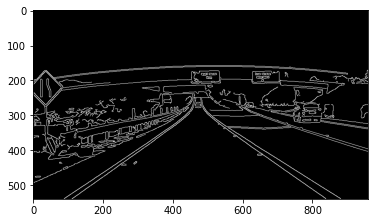

In [20]:
# Gaussian Blur
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)

# Canny Edge Detection
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

plt.imshow(masked_edges, cmap='Greys_r')

## Hough Transform

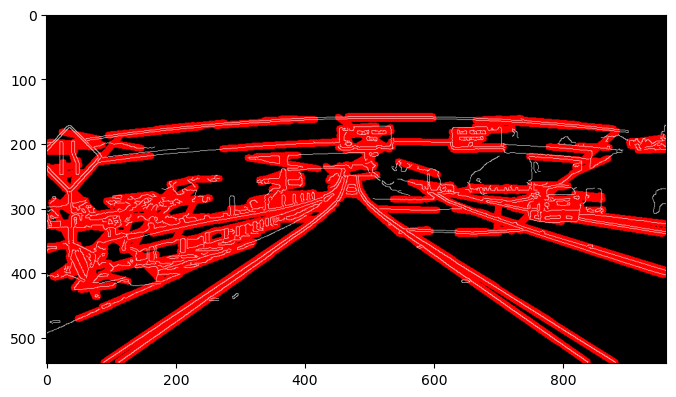

In [26]:
# STEP 1: Make a blank image of original image size to "draw on"
line_image = np.copy(image) * 0

# STEP 2: Define the parameters
rho = 2
theta = np.pi / 180
threshold = 15
max_line_gap = 20
min_line_length = 40

# STEP 3: Run Hough on edged image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# STEP 4: Iterate over output lines to draw them on the blank image
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

# STEP 5: Create a "color" binary image to combina Canny and lines
color_edges = np.dstack((masked_edges, masked_edges, masked_edges))

# STEP 6: Draw the lines on the edged image
combination = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.figure(figsize=(8,6), dpi=100)
plt.imshow(combination)